In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("/home/fvadell/ml-tests/labs-ml-group/churn/Brasil deep dive - Plana.csv")

In [3]:
data.columns

Index(['pais', 'ano_alta', 'idclientecrm', 'tipo_cliente', 'CLIENTE GRUPO',
       'Status Cliente', 'Monto_total 2018', 'ARPA (rev prom)',
       'Lead Venta Formulario', 'Lead Venta Ver Dato',
       'Lead Alquiler Formulario', 'Lead Alquiler Ver Dato',
       'Lead Alquiler temporal Formulario', 'Lead Alquiler temporal Ver Dato',
       'CP Lead Venta Formulario', 'CP Lead Venta Ver Dato',
       'CP Lead Alquiler Formulario', 'CP Lead Alquiler Ver Dato',
       'CP Lead Alquiler temporal Formulario',
       'CP Lead Alquiler temporal Ver Dato', 'LEADS',
       'contratado Super Destacado', 'contratado Destacado',
       'contratado Simple', 'contratado Desarrollo Super Destacado',
       'contratado Desarrollo Destacado', 'contratado Desarrollo Simple',
       'contratado freemium', 'Fecha Alta', 'Fecha Vto',
       'Cliente Ilimitado sin Destaque', 'Cliente Limitado', 'SD', 'D', 'S',
       'Mix SD', 'Mix D', 'Mix S', 'Mix Premium', 'Stock', 'Integrador',
       'Antigüedad', 'AO 

In [4]:
data.head()

,pais,ano_alta,idclientecrm,tipo_cliente,CLIENTE GRUPO,Status Cliente,Monto_total 2018,ARPA (rev prom),Lead Venta Formulario,Lead Venta Ver Dato,...,Stock,Integrador,Antigüedad,AO Venta,AO Alquiler,AO Alquiler temporal,% Uso,User vendedor,Equipo,Provincia
0,Brasil,2018,10400002,small,Small,Vigente,8.441,703.000,187,111,...,NaN,NO,2016-11-05,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,#ERROR!,#ERROR!
1,Brasil,2018,10400005,small,Small,Vigente,3.982,332.000,20,18,...,NaN,SI,2016-11-05,3,25,0,56%,rodrigo.serpa,Distrito Federal - Farmers,Distrito Federal
2,Brasil,2018,10400007,small,Small,Vigente,2.871,239.000,93,110,...,NaN,NO,2016-11-05,16,30,0,100%,jaqueline.lopes@wimoveis.com,Distrito Federal - Farmers,Distrito Federal
3,Brasil,2018,10400010,Big,Big,Cancelado,13.530,1.353,184,123,...,NaN,SI,2016-11-05,165,110,0,3%,juliana@wimoveis.com,Distrito Federal - Farmers,Distrito Federal
4,Brasil,2018,10400013,small,Small,Vigente,1.790,179.000,1,-,...,NaN,NO,2016-11-05,2,3,0,83%,patricia@wimoveis.com,Distrito Federal - Farmers,Distrito Federal


Cambiamos las ',' por '.' y removemos los '.'.

In [5]:
for c in list(data.columns):
    try:
        data[c] = data[c].str.replace('.', '')
        data[c] = data[c].str.replace(',', '.')
    except:
        print(c)

ano_alta
idclientecrm
Monto_total 2018
ARPA (rev prom)
LEADS
Mix D
Stock


In [6]:
data

,pais,ano_alta,idclientecrm,tipo_cliente,CLIENTE GRUPO,Status Cliente,Monto_total 2018,ARPA (rev prom),Lead Venta Formulario,Lead Venta Ver Dato,...,Stock,Integrador,Antigüedad,AO Venta,AO Alquiler,AO Alquiler temporal,% Uso,User vendedor,Equipo,Provincia
0,Brasil,2018,10400002,small,Small,Vigente,8.441,703.000,187,111,...,NaN,NO,2016-11-05,#ERROR!,#ERROR!,#ERROR!,NaN,#ERROR!,#ERROR!,#ERROR!
1,Brasil,2018,10400005,small,Small,Vigente,3.982,332.000,20,18,...,NaN,SI,2016-11-05,3,25,0,56%,rodrigoserpa,Distrito Federal - Farmers,Distrito Federal
2,Brasil,2018,10400007,small,Small,Vigente,2.871,239.000,93,110,...,NaN,NO,2016-11-05,16,30,0,100%,jaquelinelopes@wimoveiscom,Distrito Federal - Farmers,Distrito Federal
3,Brasil,2018,10400010,Big,Big,Cancelado,13.530,1.353,184,123,...,NaN,SI,2016-11-05,165,110,0,3%,juliana@wimoveiscom,Distrito Federal - Farmers,Distrito Federal
4,Brasil,2018,10400013,small,Small,Vigente,1.790,179.000,1,-,...,NaN,NO,2016-11-05,2,3,0,83%,patricia@wimoveiscom,Distrito Federal - Farmers,Distrito Federal
5,Brasil,2018,10400014,Big,Big,Vigente,16.188,1.349,181,107,...,NaN,SI,2016-11-05,138,142,0,3%,rodrigoserpa,Distrito Federal - Farmers,Distrito Federal
6,Brasil,2018,10400015,Big,Big,Vigente,46.118,3.843,433,217,...,NaN,SI,2014-09-19,178,151,0,3%,kfeitosa,Distrito Federal - Farmers,Distrito Federal
7,Brasil,2018,10400022,small,Small,Vigente,6.230,519.000,23,9,...,NaN,SI,2016-11-05,16,7,0,12%,rodrigoserpa,Distrito Federal - Farmers,Distrito Federal
8,Brasil,2018,10400024,Big,Big,Vigente,27.156,2.263,167,108,...,NaN,SI,2016-11-05,106,546,0,6%,kfeitosa,Distrito Federal - Farmers,Distrito Federal
9,Brasil,2018,10400025,small,Small,Vigente,5.839,487.000,9,4,...,NaN,NO,2016-11-05,4,21,0,13%,kfeitosa,Distrito Federal - Farmers,Distrito Federal


### Variables explicativas

Iniciamos las variables explicativas como todas las columnas del dataset e iremos sacando las que no sirven

In [7]:
data.columns

Index(['pais', 'ano_alta', 'idclientecrm', 'tipo_cliente', 'CLIENTE GRUPO',
       'Status Cliente', 'Monto_total 2018', 'ARPA (rev prom)',
       'Lead Venta Formulario', 'Lead Venta Ver Dato',
       'Lead Alquiler Formulario', 'Lead Alquiler Ver Dato',
       'Lead Alquiler temporal Formulario', 'Lead Alquiler temporal Ver Dato',
       'CP Lead Venta Formulario', 'CP Lead Venta Ver Dato',
       'CP Lead Alquiler Formulario', 'CP Lead Alquiler Ver Dato',
       'CP Lead Alquiler temporal Formulario',
       'CP Lead Alquiler temporal Ver Dato', 'LEADS',
       'contratado Super Destacado', 'contratado Destacado',
       'contratado Simple', 'contratado Desarrollo Super Destacado',
       'contratado Desarrollo Destacado', 'contratado Desarrollo Simple',
       'contratado freemium', 'Fecha Alta', 'Fecha Vto',
       'Cliente Ilimitado sin Destaque', 'Cliente Limitado', 'SD', 'D', 'S',
       'Mix SD', 'Mix D', 'Mix S', 'Mix Premium', 'Stock', 'Integrador',
       'Antigüedad', 'AO 

In [8]:
variables = list(data.columns)

Le saco la variable __Status Cliente__ porque es el target.

In [9]:
variables.remove('Status Cliente')

Saco las variables pais, ano_alta, idclientecrm, User vendedor

In [10]:
for var in ['pais', 'ano_alta', 'idclientecrm', 'User vendedor'] : variables.remove(var)

#### Caso de la columna tipo_cliente y CLIENTE GRUPO

Estas dos columnas parecen tener la misma información. Lo revisos:

In [11]:
data['tipo_cliente'].unique(), data['CLIENTE GRUPO'].unique()

(array(['small', 'Big'], dtype=object),
 array(['Small', 'Big', 'Desarrollo'], dtype=object))

In [12]:
data['tipo_cliente'] = ['Small' if x=='small' else x for x in data['tipo_cliente']]

Cantidad de coincidencias entre la columna tipo_cliente y CLIENTE GRUPO

In [13]:
np.where(data['tipo_cliente'] == data['CLIENTE GRUPO'], True, False).sum()

13544

Porcentaje de coincidencias

In [14]:
np.where(data['tipo_cliente'] == data['CLIENTE GRUPO'], True, False).sum()*100/len(data)

96.17269047788113

Por lo tanto, no usaremos la columna __tipo_cliente__ porque tiene prácticamente la misma información que __CLIENTE GRUPO__

In [15]:
variables.remove('tipo_cliente')

Por último vamos a cambiar el valor de 'Small' por 0 y 'Big' por 1

In [16]:
data['CLIENTE GRUPO'] = ['0' if x == 'Small' else '1' for x in data['CLIENTE GRUPO']]

#### Caso columna Stock

Parece no tener datos: Nos fijamos:

In [17]:
len(data[data['Stock'].notna()])

0

La columna __Stock__ no tiene datos así que (por ahora) la dropeo

In [18]:
variables.remove('Stock')

#### Caso columnas Mix

Las columnas mix son complejas y sólo se aplican si la columna _Ilimtado Sin Destaque_ es 0. Por ahora las sacamos:

In [19]:
for var in ['Mix SD', 'Mix D', 'Mix S', 'Mix Premium'] : variables.remove(var)

#### Caso columna % Uso

Tiene un %98 de datos no nulos, pero no sabemos muy bien qué lógica encierra así que por ahora lo dejamos afuera de las variables explicativas.

In [20]:
len(data[data['% Uso'].notna()])/len(data)

0.981253994177377

In [21]:
variables.remove('% Uso')

#### Caso Cliente Ilimitado sin Destaque vs Cliente Limitado

Solo la primer fila tiene error en estas columnas.

Lo que haremos es ver en cuántas veces son distintas. Si siempre son distintas significa que son opuestas.

In [22]:
data[(data['Cliente Limitado']!='1')&(data['Cliente Limitado']!='0')].filter(['Cliente Ilimitado sin Destaque', 'Cliente Limitado'])

,Cliente Ilimitado sin Destaque,Cliente Limitado
0,#ERROR!,#ERROR!


In [23]:
data[(data['Cliente Ilimitado sin Destaque']!='1')&(data['Cliente Ilimitado sin Destaque']!='0')].filter(['Cliente Ilimitado sin Destaque', 'Cliente Limitado'])

,Cliente Ilimitado sin Destaque,Cliente Limitado
0,#ERROR!,#ERROR!


In [24]:
data['Cliente Ilimitado sin Destaque'].unique(), data['Cliente Limitado'].unique()

(array(['#ERROR!', '0', '1'], dtype=object),
 array(['#ERROR!', '1', '0'], dtype=object))

In [25]:
np.where(data['Cliente Ilimitado sin Destaque'] != data['Cliente Limitado'], True, False).sum()*100/len(data)

99.9928992402187

Casi en el 100% de los datos estas columnas son opuestas, así que sacaremos _Cliente Ilimtado sin Destaque_.

In [26]:
variables.remove('Cliente Ilimitado sin Destaque')

#### Caso Lead Alquiler Formulario' 'Lead Alquiler Ver Dato' 'Lead Alquiler temporal Formulario' 'Lead Alquiler temporal Ver Dato

Estas columnas tienen un '  -   ' en vez de 0. Vamos a reemplazarlos por 0.

In [27]:
for column in ['Lead Venta Formulario', 'Lead Venta Ver Dato','Lead Alquiler Formulario', 'Lead Alquiler Ver Dato','Lead Alquiler temporal Formulario', 'Lead Alquiler temporal Ver Dato']:
    data[column] = data[column].replace('  -   ' ,'0')

#### Caso columna Integrador

Toma valores 'SI' y 'NO' que cambio por '1' y '0' respectivamente

In [28]:
data['Integrador'].unique()

array(['NO', 'SI'], dtype=object)

In [29]:
data['Integrador'] = ['1' if x=='SI' else '0' for x in data['Integrador']]

#### Caso columnas CP

Las columnas CP Lead Venta Formulario', 'CP Lead Venta Ver Dato',
       'CP Lead Alquiler Formulario', 'CP Lead Alquiler Ver Dato',
       'CP Lead Alquiler temporal Formulario',
       'CP Lead Alquiler temporal Ver Dato'
Se forman haciendo el monto total dividdo los Leads correspondientes, pero trae problemas cuando no hay leads. Por ahora las sacamos.

In [30]:
for column in ['CP Lead Venta Formulario', 'CP Lead Venta Ver Dato',
       'CP Lead Alquiler Formulario', 'CP Lead Alquiler Ver Dato',
       'CP Lead Alquiler temporal Formulario',
       'CP Lead Alquiler temporal Ver Dato']:
    variables.remove(column)

#### Caso Fechas

Para el modelo base voy a desestimar las fechas, que son:

'Fecha Alta', 'Fecha Vto' y 'Antigüedad'

In [31]:
for f in ['Fecha Alta', 'Fecha Vto', 'Antigüedad'] : variables.remove(f)

In [32]:
variables

['CLIENTE GRUPO',
 'Monto_total 2018',
 'ARPA (rev prom)',
 'Lead Venta Formulario',
 'Lead Venta Ver Dato',
 'Lead Alquiler Formulario',
 'Lead Alquiler Ver Dato',
 'Lead Alquiler temporal Formulario',
 'Lead Alquiler temporal Ver Dato',
 'LEADS',
 'contratado Super Destacado',
 'contratado Destacado',
 'contratado Simple',
 'contratado Desarrollo Super Destacado',
 'contratado Desarrollo Destacado',
 'contratado Desarrollo Simple',
 'contratado freemium',
 'Cliente Limitado',
 'SD',
 'D',
 'S',
 'Integrador',
 'AO Venta',
 'AO Alquiler',
 'AO Alquiler temporal',
 'Equipo',
 'Provincia']

#### Caso Columna LEADS

La columna 'LEADS' no tiene datos asi que la sacamos:

In [33]:
data['LEADS'].isna().sum()/len(data)

1.0

In [34]:
variables.remove('LEADS')

#### Caso Equipo

En una primera instancia vamos a sacar la columna 'Equipo' de las variables explicativas porque no sabemos qué refleja.

In [35]:
variables.remove('Equipo')

#### Caso Columnas AO

Sacamos del análisis las columnas 'AO Venta', 'AO Alquiler' y 'AO Alquiler temporal' ya que no sabemos qué significa y tiene valores NaN.

In [36]:
for ao in ['AO Venta', 'AO Alquiler', 'AO Alquiler temporal'] : variables.remove(ao)

#### Caso columnas contratado

Hay algunos 'NaN' en las columnas de contratados. Las cambio por 0.

In [37]:
for c in ['contratado Super Destacado','contratado Destacado',
 'contratado Simple',
 'contratado Desarrollo Super Destacado',
 'contratado Desarrollo Destacado',
 'contratado Desarrollo Simple',
 'contratado freemium',] :
    data[c] = data[c].fillna(0)

#### Caso columnas ARPA

ARPA es exactamente Monto / 12, por lo tanto es redundante.

In [38]:
variables.remove('ARPA (rev prom)')

#### Caso columnas SD, S, D

Las tres columnas son simplemente la suma de otras dos así que vamos a sacarlas.

In [39]:
variables.remove('SD')
variables.remove('S')
variables.remove('D')

## Variables

#### Todas las variables

In [40]:
data.columns

Index(['pais', 'ano_alta', 'idclientecrm', 'tipo_cliente', 'CLIENTE GRUPO',
       'Status Cliente', 'Monto_total 2018', 'ARPA (rev prom)',
       'Lead Venta Formulario', 'Lead Venta Ver Dato',
       'Lead Alquiler Formulario', 'Lead Alquiler Ver Dato',
       'Lead Alquiler temporal Formulario', 'Lead Alquiler temporal Ver Dato',
       'CP Lead Venta Formulario', 'CP Lead Venta Ver Dato',
       'CP Lead Alquiler Formulario', 'CP Lead Alquiler Ver Dato',
       'CP Lead Alquiler temporal Formulario',
       'CP Lead Alquiler temporal Ver Dato', 'LEADS',
       'contratado Super Destacado', 'contratado Destacado',
       'contratado Simple', 'contratado Desarrollo Super Destacado',
       'contratado Desarrollo Destacado', 'contratado Desarrollo Simple',
       'contratado freemium', 'Fecha Alta', 'Fecha Vto',
       'Cliente Ilimitado sin Destaque', 'Cliente Limitado', 'SD', 'D', 'S',
       'Mix SD', 'Mix D', 'Mix S', 'Mix Premium', 'Stock', 'Integrador',
       'Antigüedad', 'AO 

#### Variables que no necesitan explicación:

pais, ano_alta, idclentecrm, tipo_cliente, Status Cliente, Monto_total 2018, contratado Super Destacado, contratado Desarrollo Super Destacado, CP Lead Venta Formulario, CP Lead Venta Ver Dato, CP Lead Alquiler Formulario, CP Lead Alquiler Ver Dato, CP Lead Alquiler temporal Formulario, CP Lead Alquiler temporal Ver Dato, contratado Simple, contratado Desarrollo Super Destacado, contratado Desarrollo Destacado, contratado Desarrollo Simple, contratado freemium, SD, D, S, User vendedor, Provincia.

#### Variables que necesitan explicación

__Lead Venta Formulario, Lead Venta Ver Dato, Lead Alquiler Formulario, Lead Alquiler Ver Dato, Lead Alquiler temporal Formulario, Lead Alquiler temporal Ver Dato__: ¿Cuál es la diferencia entre Formulario y Ver Dato?

__LEADS__: Esta variable no tiene datos pero ¿debería ser la suma de los anteriores?

__Fecha Vto__: ¿Qué se vence en esta fecha?

__Cliente ilimitado sin Destaque y Cliente Limitado__: Parecen ser opuestas, ¿qué significa cada una?

__Mix Premium, Mix SD, Mix, D, Mix S__: Todas se calculan sólo si es Cliente Ilimitado sin Destaque y es un cociente pero no se entiende la elección del numerador y el denominador.

__AO Venta, AO Alquiler, AO Alquiler temporal__: ¿Que significan estas columnas?

__% Uso__: ¿Qué representa? Según la fórmula de Excel utiliza algunas columnas AO. También tiene el 'problema' de que podría dar más de %100 si no fuera que tiene una cota forzada.

__Antigüedad y Fecha Alta__: Los datos en estas dos columnas no coinciden, ¿deberían? ¿qué nos dice cada una?

#### Comentarios y Referencias

__CLIENTE GRUPO__: Toma los valores 'Small', 'Big' y 'Desarrollo' pero ¿se clasifica en base a qué?. Es importante saber esto porque si se usan los mismos datos del dataset para hacer esta clasificación va a ser mejor sacar esta variable del modelo.

__ARPA__: Se entiende que es el promedio por mes del monto total del año.

__SD__: Suma de 'contratado Super Destacado' y 'contratado Desarrollo Super Destacado'.

__D__: Suma de 'contratado Destacado' y 'contratado Desarrollo Destacado'.

__S__: Suma de 'contratado Simple y 'contratado Desarrollo Simple'.

__ano_alta__: Entiendo que se refiere al año de donde se extraen los datos y no al año donde se dió de alta el usuario. Esa información asumimos que la tiene el campo 'Fecha alta'.

#### Mix Premium

Se calcula con la siguiente fórmula de excel

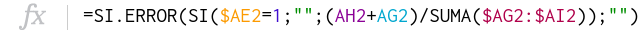

Donde:

__AE__: Cliente Ilimitado sin Destaque (Toma valores 0 y 1)

__AH__: D (Cantidad de Destacados?)

__AG__: SD (Cantdad de Super Destacados?)

__AI__: S (Cantidad de Simples?)

junto small y Small en la misma categoría

#### % Uso

Se calcula con la siguiente fórmula de excel

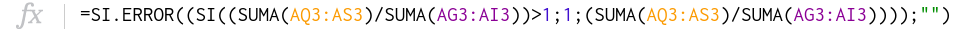

Donde:

__AQ__: AO Venta (Qué es?)

__AS__: AO Alquiler temporal

__AG__: SD (Cantdad de Super Destacados?)

__AI__: S (Cantidad de Simples?)

#### Qué es 'Equipo'?

### Random Forest Classifier

Las variables que usaremos para el modelo base son:

In [41]:
data.filter(['Provincia']).head()

,Provincia
0,#ERROR!
1,Distrito Federal
2,Distrito Federal
3,Distrito Federal
4,Distrito Federal


In [42]:
variables

['CLIENTE GRUPO',
 'Monto_total 2018',
 'Lead Venta Formulario',
 'Lead Venta Ver Dato',
 'Lead Alquiler Formulario',
 'Lead Alquiler Ver Dato',
 'Lead Alquiler temporal Formulario',
 'Lead Alquiler temporal Ver Dato',
 'contratado Super Destacado',
 'contratado Destacado',
 'contratado Simple',
 'contratado Desarrollo Super Destacado',
 'contratado Desarrollo Destacado',
 'contratado Desarrollo Simple',
 'contratado freemium',
 'Cliente Limitado',
 'Integrador',
 'Provincia']

#### Modelo Base

get_dummies transforma variables categóricas en one-hot encodings

In [43]:
dummies = pd.get_dummies(data.filter(['Provincia']))
dummies.columns

Index(['Provincia_#ERROR!', 'Provincia_Alagoas', 'Provincia_Amazonas',
       'Provincia_Bahia', 'Provincia_Ceará', 'Provincia_Distrito Federal',
       'Provincia_Espírito Santo', 'Provincia_Goiás', 'Provincia_Maranhão',
       'Provincia_Mato Grosso', 'Provincia_Mato Grosso Do Sul',
       'Provincia_Minas Gerais', 'Provincia_Paraná', 'Provincia_Paraíba',
       'Provincia_Pará', 'Provincia_Pernambuco', 'Provincia_Piauí',
       'Provincia_Rio De Janeiro', 'Provincia_Rio Grande Do Norte',
       'Provincia_Rio Grande Do Sul', 'Provincia_Rondônia',
       'Provincia_Roraima', 'Provincia_Santa Catarina', 'Provincia_Sergipe',
       'Provincia_São Paulo', 'Provincia_Tocantins'],
      dtype='object')

In [44]:
dummies.drop('Provincia_#ERROR!', axis=1, inplace=True)

In [45]:
dummies.head(1)

,Provincia_Alagoas,Provincia_Amazonas,Provincia_Bahia,Provincia_Ceará,Provincia_Distrito Federal,Provincia_Espírito Santo,Provincia_Goiás,Provincia_Maranhão,Provincia_Mato Grosso,Provincia_Mato Grosso Do Sul,...,Provincia_Piauí,Provincia_Rio De Janeiro,Provincia_Rio Grande Do Norte,Provincia_Rio Grande Do Sul,Provincia_Rondônia,Provincia_Roraima,Provincia_Santa Catarina,Provincia_Sergipe,Provincia_São Paulo,Provincia_Tocantins
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
data_dummies = data.join(dummies)

Cambiamos la variable 'Provincia' por one hot encodings de esa misma información

In [47]:
variables = variables + list(dummies.columns)
variables.remove('Provincia')

Dropeo la primer fila que tiene errores

In [48]:
data_dummies.drop(0, inplace = True)

In [49]:
data_dummies = data_dummies.filter(variables + ['Status Cliente'])

In [50]:
X = data_dummies.filter(variables).values
y = data_dummies.filter(['Status Cliente']).values

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [52]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=1000, criterion = 'gini')
rfc.fit(X_train, y_train.ravel()) #si le saco el ravel() me tira un warning
y_pred = rfc.predict(X_test)

In [53]:
y_pred_proba = rfc.predict_proba(X_test)

### Métricas

list(y_test.reshape(1, -1)[0]). Toda esta parafernalia es para poder cambiarle la forma a y_test y podes compararlo contra y_pred

In [54]:
res = (y_pred == list(y_test.reshape(1, -1)[0]))
print('Accuracy: ', res.sum()*100/len(y_test))

Accuracy:  75.62707051585424


In [55]:
perc_c = np.array([x == 'Cancelado' for x in list(y_test.reshape(1, -1)[0])]).sum()*100/len(y_test)

In [56]:
print('Porcentaje de Cancelados en test set: ', perc_c)

Porcentaje de Cancelados en test set:  41.410317084713675


In [57]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_pred, y_test)

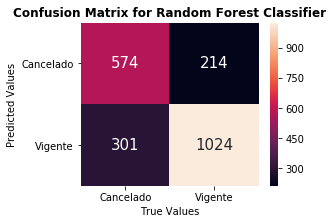

In [58]:
plt.figure(figsize = (4,3))
classes = ['Cancelado', 'Vigente']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 15},fmt="d")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
ax.set_yticklabels(classes, rotation=0)
ax.set_xticklabels(classes, rotation=0)
plt.title('Confusion Matrix for Random Forest Classifier', fontweight="bold");

In [59]:
def print_metrics(confusion):
        
    n = confusion.sum()
    p = (confusion[0][0]+confusion[1][1])/n
    p_c = confusion[0][0]/(confusion[0][0]+confusion[1][0])
    p_v = confusion[1][1]/(confusion[0][1]+confusion[1][1])
    recall = confusion[0][0]/(confusion[0][0]+confusion[0][1])
    
    print('Number of test values: ', n)
    print('Overall Accuracy: ', p*100)
    print('Accuracy on Cancelado: ', p_c*100)
    print('Accuracy on Vigente: ', p_v*100)
    print('Recall: ', recall)

In [60]:
print_metrics(confusion)

Number of test values:  2113
Overall Accuracy:  75.62707051585423
Accuracy on Cancelado:  65.60000000000001
Accuracy on Vigente:  82.7140549273021
Recall:  0.7284263959390863


In [61]:
probas = [x.max() for x in y_pred_proba]

In [62]:
preds_df = pd.DataFrame()

In [63]:
y_test.shape

(2113, 1)

In [64]:
preds_df['y_test'] = list(y_test.reshape(1, -1)[0])
preds_df['y_pred'] = y_pred
preds_df['probas'] = probas
preds_df['Correct'] = np.where(preds_df['y_test'] == preds_df['y_pred'], True, False)
preds_df.sort_values(by = 'probas', ascending = False).reset_index(drop = True).head(20)

,y_test,y_pred,probas,Correct
0,Vigente,Cancelado,1.000000,False
1,Cancelado,Cancelado,1.000000,True
2,Vigente,Cancelado,1.000000,False
3,Cancelado,Cancelado,1.000000,True
4,Cancelado,Cancelado,1.000000,True
5,Cancelado,Cancelado,1.000000,True
6,Cancelado,Cancelado,1.000000,True
7,Cancelado,Cancelado,0.999150,True
8,Vigente,Cancelado,0.999000,False
9,Cancelado,Cancelado,0.998767,True


In [65]:
top_preds = preds_df[preds_df['probas']>0.9]

In [66]:
confusion = confusion_matrix(top_preds['y_pred'], top_preds['y_test'])

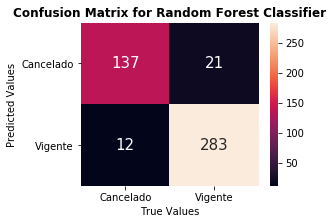

In [67]:
plt.figure(figsize = (4,3))
classes = ['Cancelado', 'Vigente']
ax = sns.heatmap(confusion, annot=True, annot_kws={"size": 15},fmt="d")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
ax.set_yticklabels(classes, rotation=0)
ax.set_xticklabels(classes, rotation=0)
plt.title('Confusion Matrix for Random Forest Classifier', fontweight="bold");

In [68]:
print_metrics(confusion)

Number of test values:  453
Overall Accuracy:  92.71523178807946
Accuracy on Cancelado:  91.94630872483222
Accuracy on Vigente:  93.0921052631579
Recall:  0.8670886075949367


#### Importancia de variables

Creamos el DataFrame que tiene cada variable acompañada con el 'peso' o importancia que tiene dentro del modelo.

In [69]:
features = pd.DataFrame()
features['feature'] = variables
features['importance'] = rfc.feature_importances_
features = features.sort_values(by = 'importance', ascending = False).reset_index(drop = True)

In [70]:
features

,feature,importance
0,Monto_total 2018,0.256813
1,Lead Venta Formulario,0.124461
2,Lead Venta Ver Dato,0.105269
3,Lead Alquiler Formulario,0.089789
4,contratado Destacado,0.081159
5,Lead Alquiler Ver Dato,0.074188
6,contratado Simple,0.071163
7,contratado Super Destacado,0.057483
8,Integrador,0.021593
9,Provincia_São Paulo,0.015331


#### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross = cross_val_score(rfc, X, y.ravel(), cv = 5)

In [73]:
cross.mean()

0.7463351906053424